In [0]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import io

### Read the input file and check the data dimension

In [6]:
from google.colab import files
uploaded = files.upload()

Saving german_credit.csv to german_credit.csv


In [7]:
data_raw = pd.read_csv(io.BytesIO(uploaded['german_credit.csv']))

print(data_raw.shape)
print(data_raw.columns)
print(data_raw.info())

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null 

In [0]:
## making a copy of our dataset

data_train = data_raw.copy(deep=True)

In [9]:
data_train.sample(4)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
646,0,< 0 DM,30,no credits taken/ all credits paid back duly,radio/television,4583,... < 100 DM,1 <= ... < 4 years,2,male : divorced/separated,guarantor,2,real estate,32,none,own,2,skilled employee / official,1,none,yes
70,0,no checking account,36,existing credits paid back duly till now,car (used),8133,... < 100 DM,1 <= ... < 4 years,1,female : divorced/separated/married,none,2,if not A121 : building society savings agreeme...,30,bank,own,1,skilled employee / official,1,none,yes
749,0,no checking account,15,existing credits paid back duly till now,car (used),3029,... < 100 DM,4 <= ... < 7 years,2,male : single,none,2,"if not A121/A122 : car or other, not in attrib...",33,none,own,1,skilled employee / official,1,none,yes
861,1,no checking account,18,delay in paying off in the past,business,2169,... < 100 DM,1 <= ... < 4 years,4,male : married/widowed,none,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [0]:
#######################  IDENTIFYING THE NULL VALUES #############################

In [11]:
data_train.isnull().sum().sort_values(ascending=False)

foreign_worker                0
personal_status_sex           0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
other_debtors                 0
telephone                     0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
default                       0
dtype: int64

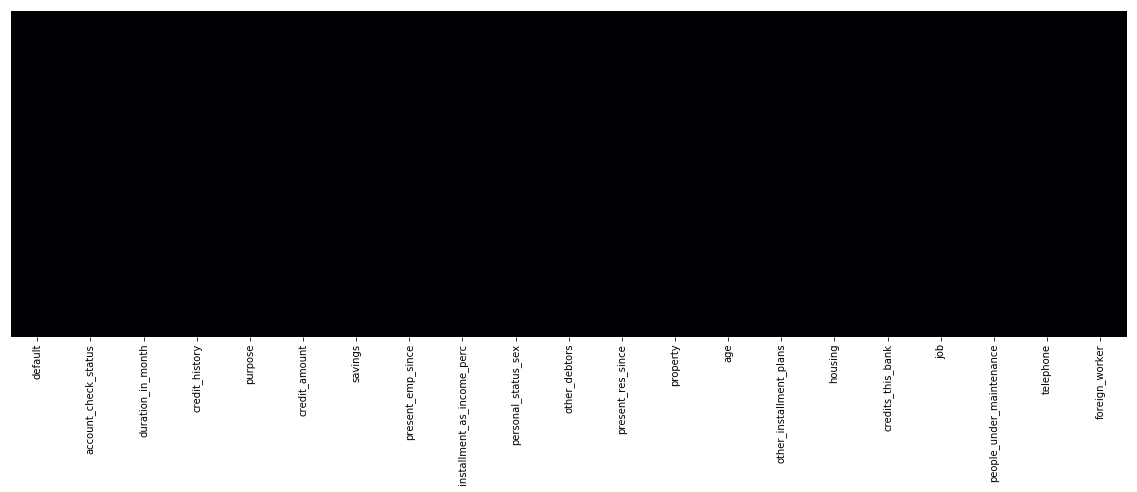

In [12]:

## finding the null and missing values in the database
plt.figure(figsize=(20,6))
sns.heatmap(data_train.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno') 

## since we don't have any null values so graph shows uniform color for all attributes

In [0]:
############################################  FEATURE ANALYSIS ################################################################################

In [0]:
##################  CHECKING THE DISTRIBUTION OF CONTONOUS COLUMNS ####################################



In [14]:
data_train.select_dtypes(exclude='object').columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance'],
      dtype='object')

In [15]:

data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


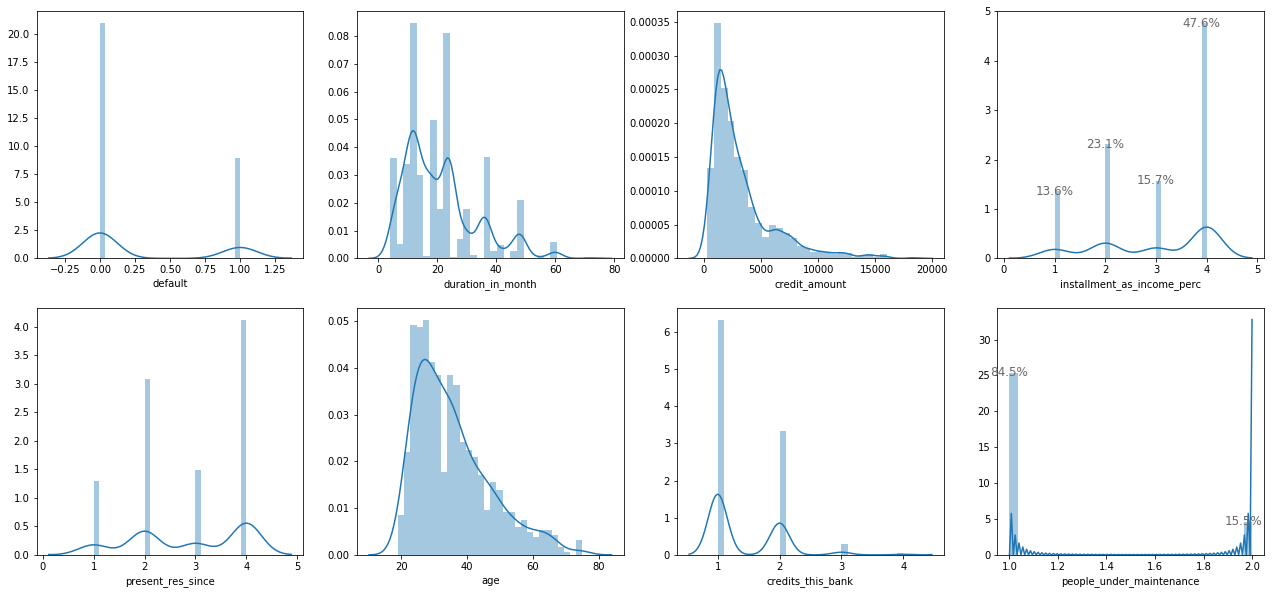

In [45]:
fig, qaxis = plt.subplots(2,4,figsize=(22,10))
col_d = data_train.select_dtypes(exclude='object').columns
i=0
j=0
k=0
for i in range (len(col_d)):
  
  ax= sns.distplot(data_train[col_d[i]],bins=30,ax = qaxis[j,k])
  k=k+1
  j=j
  if k==4:
    j=j+1
    k=0
    
    totals = []
     # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        if i.get_height() != 0:
          ax.text(i.get_x(), i.get_height(),str(round((i.get_height()/total)*100, 2))+'%',ha = 'center', va = 'center', fontsize=12,color='dimgrey', rotation=0)


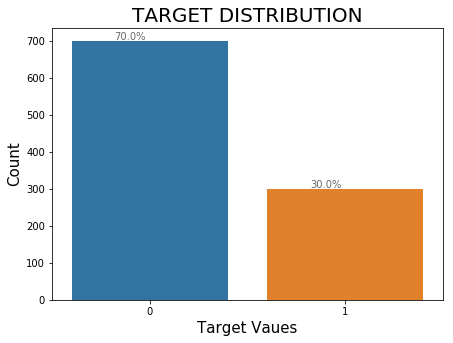

In [46]:
fig, qaxis1 = plt.subplots(1,1,figsize=(7,5))           
ax = sns.countplot(x=data_train['default'])

ax.set_title("TARGET DISTRIBUTION", fontsize = 20)
ax.set_xlabel("Target Vaues", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.30, i.get_height()+10,str(round((i.get_height()/total)*100, 2))+'%',ha = 'center', va = 'center', fontsize=10,color='dimgrey', rotation=0)
    


In [0]:
#########################################  INFERENCES ##################################################################

# default column is our target dependent column and have 0 and 1 as value,70% records have value as 0 (applicant is considered a Bad credit risk) 
#                and 30% of our dataset have 1 value (applicant is considered a Good credit risk) 
# duration in month - this is the duration for which the applicant had applied for loan. Duration starts from 4 months to max 72 months(6 yrs).However on an average each 
#                      applicant applied for 20 months or one and half yrs
# credit_amount  ---  amount for which applicant applied , mean value show the disbtrbution around 32000 with few applied for 18000
# installment_as_income_perc  -- number of installments applicant is likely to pay back the loan , mostly 75% applicant applied for 4 installments
# present_res_since  -- I think this is the duration from which applicant is living in his residence.Average is 2.8 but majority is 4
# age - shows distribution of age of the applicant around age 35 ranging from 46 to 24. However applicant also belongs to some lower age group as well 
#        and very few are of higher age group 
# credits_this_bank  - 1, 2 ,3 where 1 is in majoroty
# people_under_maintenance - values as 1(84%) and 2(16%)

In [0]:
##################  CHECKING THE DISTRIBUTION OF CATEGORICAL COLUMNS ####################################


In [0]:


x = data_train.select_dtypes(include='object').columns

In [0]:
## ANALYSING the columns  - account_check_status

print(data_train['account_check_status'].nunique() ) ## for column account_check_status we have four unique values

print(data_train['account_check_status'].unique() ) ## four distinct values in this column are - < 0 DM,0 <= ... < 200 DM,no checking account,
#                                                                                                >= 200 DM / salary assignments for at least 1 year

# lets categorize these values with 0,1,2,3 respectively as these are ordinal in nature ie 0<1<2<3

account_check_status_values = {'no checking account':0,'< 0 DM':1, '0 <= ... < 200 DM':2, '>= 200 DM / salary assignments for at least 1 year':3}
data_train['account_check_status'] = data_train['account_check_status'].replace(account_check_status_values)

In [50]:
## verifying if the replacement is done successfully

print(data_train['account_check_status'].nunique() ) 

print(data_train['account_check_status'].unique() ) 

4
[1 2 0 3]


In [51]:
## ANALYSING the columns  - credit_history

print(data_train['credit_history'].nunique() ) ## for column credit_history we have five unique values

print(data_train['credit_history'].unique() ) ## five distinct values in this column are  =>

##  'critical account/ other credits existing (not at this bank)' , 'existing credits paid back duly till now', 'delay in paying off in the past',
##   'no credits taken/ all credits paid back duly' 'all credits at this bank paid back duly'
                                                                                              

# lets categorize these values with 1,2,3,4,5 respectively


5
['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']


In [52]:
credit_history_values = {'critical account/ other credits existing (not at this bank)':1, 'existing credits paid back duly till now':2,
                          'delay in paying off in the past':3, 'no credits taken/ all credits paid back duly':4, 'all credits at this bank paid back duly':5}
data_train['credit_history'] = data_train['credit_history'].replace(credit_history_values)

## verifying if the replacement is done successfully

print(data_train['credit_history'].nunique() ) 

print(data_train['credit_history'].unique() ) 

5
[1 2 3 4 5]


In [53]:
## ANALYSING the columns  - purpose

print(data_train['purpose'].nunique() ) ## for column purpose we have 10 unique values

print(data_train['purpose'].unique() ) ## 10 distinct values in this column are  =>

##  'domestic appliances' ,'(vacation - does not exist?)' ,'radio/television','car (new)', 'car (used)' ,'business', 'repairs' ,'education',
##   'furniture/equipment', 'retraining'
                                                                                              

# lets categorize these values with 1,2,3,4,5,6,7,8,9,10 respectively


10
['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']


In [54]:
purpose_values = {'domestic appliances' :1,'(vacation - does not exist?)' :2,'radio/television':3,'car (new)':4, 'car (used)':5 ,'business':6, 'repairs':7 ,'education':8,
                  'furniture/equipment':9, 'retraining':10}
data_train['purpose'] = data_train['purpose'].replace(purpose_values)

## verifying if the replacement is done successfully

print(data_train['purpose'].nunique() ) 

print(data_train['purpose'].unique() ) 

10
[ 1  2  3  4  5  6  7  8  9 10]


In [55]:
## ANALYSING the columns  - savings

print(data_train['savings'].nunique() ) ## for column savings we have 5 unique values

print(data_train['savings'].unique() ) ## 5 distinct values in this column are  =>

##  'unknown/ no savings account', '... < 100 DM' , '500 <= ... < 1000 DM ' ,  '.. >= 1000 DM ' , '100 <= ... < 500 DM'

                                                                                              

# lets categorize these values with 0,1,2,3,4 ,also these categories are ordinal in nature


5
['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']


In [56]:
savings_values = {'unknown/ no savings account':0,'... < 100 DM' :1,'100 <= ... < 500 DM' :2,'500 <= ... < 1000 DM ':3,'.. >= 1000 DM ':4}
data_train['savings'] = data_train['savings'].replace(savings_values)

## verifying if the replacement is done successfully

print(data_train['savings'].nunique() ) 

print(data_train['savings'].unique() ) 

5
[0 1 3 4 2]


In [57]:
## ANALYSING the columns  - present_emp_since

print(data_train['present_emp_since'].nunique() ) ## for column present_emp_since we have 5 unique values

print(data_train['present_emp_since'].unique() ) ## 5 distinct values in this column are  =>

##  'unemployed', '... < 1 year ' , '1 <= ... < 4 years' ,  '4 <= ... < 7 years' , '.. >= 7 years'

                                                                                              

# lets categorize these values with 0,1,2,3,4 ,also these categories are ordinal in nature


5
['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year ']


In [58]:
present_emp_since_values = {'unemployed':0,'... < 1 year ' :1,'1 <= ... < 4 years' :2,'4 <= ... < 7 years':3,'.. >= 7 years':4}
data_train['present_emp_since'] = data_train['present_emp_since'].replace(present_emp_since_values)

## verifying if the replacement is done successfully

print(data_train['present_emp_since'].nunique() ) 

print(data_train['present_emp_since'].unique() ) 

5
[4 2 3 0 1]


In [59]:
## ANALYSING the columns  - personal_status_sex

print(data_train['personal_status_sex'].nunique() ) ## for column personal_status_sex we have 4 unique values

print(data_train['personal_status_sex'].unique() ) ## 4 distinct values in this column are  =>

##  'male : single', 'female : divorced/separated/married' , 'male : divorced/separated' ,  'male : married/widowed' 
                                                                                              

# lets categorize these values with 1,2,3,4 ,


4
['male : single' 'female : divorced/separated/married'
 'male : divorced/separated' 'male : married/widowed']


In [60]:
personal_status_sex_values = {'male : single':1, 'female : divorced/separated/married' :2, 'male : divorced/separated':3 ,  'male : married/widowed' :4}
data_train['personal_status_sex'] = data_train['personal_status_sex'].replace(personal_status_sex_values)

## verifying if the replacement is done successfully

print(data_train['personal_status_sex'].nunique() ) 

print(data_train['personal_status_sex'].unique() ) 

4
[1 2 3 4]


In [61]:
## ANALYSING the columns  - other_debtors

print(data_train['other_debtors'].nunique() ) ## for column other_debtors we have 4 unique values

print(data_train['other_debtors'].unique() ) ## 4 distinct values in this column are  =>

##  'none', 'guarantor', 'co-applicant'
                                                                                              

# lets categorize these values with 1,2,3,4 ,


3
['none' 'guarantor' 'co-applicant']


In [62]:
other_debtors_values = {'none':1, 'guarantor' :2, 'co-applicant':3 }
data_train['other_debtors'] = data_train['other_debtors'].replace(other_debtors_values)

## verifying if the replacement is done successfully

print(data_train['other_debtors'].nunique() ) 

print(data_train['other_debtors'].unique() ) 

3
[1 2 3]


In [63]:
## ANALYSING the columns  - property

print(data_train['property'].nunique() ) ## for column property we have 4 unique values

print(data_train['property'].unique() ) ## 4 distinct values in this column are  =>

##  'real estate', 'if not A121 : building society savings agreement/ life insurance', 'unknown / no property', 'if not A121/A122 : car or other, not in attribute 6'
                                                                                              

# lets categorize these values with 1,2,3,4 ,

4
['real estate'
 'if not A121 : building society savings agreement/ life insurance'
 'unknown / no property'
 'if not A121/A122 : car or other, not in attribute 6']


In [64]:
property_values = {'real estate':1, 'if not A121 : building society savings agreement/ life insurance' :2, 'unknown / no property':3 ,'if not A121/A122 : car or other, not in attribute 6':4}
data_train['property'] = data_train['property'].replace(property_values)

## verifying if the replacement is done successfully

print(data_train['property'].nunique() ) 

print(data_train['property'].unique() ) 

4
[1 2 3 4]


In [65]:
## ANALYSING the columns  - other_installment_plans

print(data_train['other_installment_plans'].nunique() ) ## for column other_installment_plans we have 3 unique values

print(data_train['other_installment_plans'].unique() ) ## 3 distinct values in this column are  =>

## 'none' ,'bank', 'stores'
                                                                                              

# lets categorize these values with 1,2,3,4


3
['none' 'bank' 'stores']


In [66]:
other_installment_plans_values = {'none':1, 'bank' :2, 'stores':3 }
data_train['other_installment_plans'] = data_train['other_installment_plans'].replace(other_installment_plans_values)

## verifying if the replacement is done successfully

print(data_train['other_installment_plans'].nunique() ) 

print(data_train['other_installment_plans'].unique() ) 

3
[1 2 3]


In [67]:
## ANALYSING the columns  - housing

print(data_train['housing'].nunique() ) ## for column housing we have 3 unique values

print(data_train['housing'].unique() ) ## 3 distinct values in this column are  =>

## 'own' ,'for free', 'rent'
                                                                                              

# lets categorize these values with 1,2,3,4 ,also these categories are ordinal in nature


3
['own' 'for free' 'rent']


In [68]:
housing_values = {'own':1, 'for free' :2, 'rent':3 }
data_train['housing'] = data_train['housing'].replace(housing_values)

## verifying if the replacement is done successfully

print(data_train['housing'].nunique() ) 

print(data_train['housing'].unique() ) 

3
[1 2 3]


In [69]:
## ANALYSING the columns  - job

print(data_train['job'].nunique() ) ## for column job we have 4 unique values

print(data_train['job'].unique() ) ## 4 distinct values in this column are  =>

## 'skilled employee / official', 'unskilled - resident' ,'management/ self-employed/ highly qualified employee/ officer', 'unemployed/ unskilled - non-resident'
                                                                                              

# lets categorize these values with 1,2,3,4 


4
['skilled employee / official' 'unskilled - resident'
 'management/ self-employed/ highly qualified employee/ officer'
 'unemployed/ unskilled - non-resident']


In [70]:
job_values = {'skilled employee / official':1 ,'unskilled - resident':2, 'management/ self-employed/ highly qualified employee/ officer' :3, 'unemployed/ unskilled - non-resident':4}
data_train['job'] = data_train['job'].replace(job_values)

## verifying if the replacement is done successfully

print(data_train['job'].nunique() ) 

print(data_train['job'].unique() ) 

4
[1 2 3 4]


In [71]:
## ANALYSING the columns  - telephone

print(data_train['telephone'].nunique() ) ## for column telephone we have 2 unique values

print(data_train['telephone'].unique() ) ## 2 distinct values in this column are  =>

## 'yes, registered under the customers name ' ,'none'
                                                                                              

# lets categorize these values with 1,2


2
['yes, registered under the customers name ' 'none']


In [72]:
telephone_values = {'yes, registered under the customers name ':1 ,'none':2}
data_train['telephone'] = data_train['telephone'].replace(telephone_values)

## verifying if the replacement is done successfully

print(data_train['telephone'].nunique() ) 

print(data_train['telephone'].unique() ) 

2
[1 2]


In [73]:
## ANALYSING the columns  - foreign_worker

print(data_train['foreign_worker'].nunique() ) ## for column foreign_worker we have 2 unique values

print(data_train['foreign_worker'].unique() ) ## 2 distinct values in this column are  =>

## 'yes' ,'no'
                                                                                              

# lets categorize these values with 1,2


2
['yes' 'no']


In [74]:
foreign_worker_values = {'yes':1 ,'no':2}
data_train['foreign_worker'] = data_train['foreign_worker'].replace(foreign_worker_values)

## verifying if the replacement is done successfully

print(data_train['foreign_worker'].nunique() ) 

print(data_train['foreign_worker'].unique() ) 

2
[1 2]


In [0]:
##################  After analysing and converting each categorical attribute to numeric, let's show there count plot ###################################

In [0]:
##################### converting object to category #######################################

i=0
for i in range(len(x)):
  data_train[x[i]] = data_train[x[i]].astype('category')

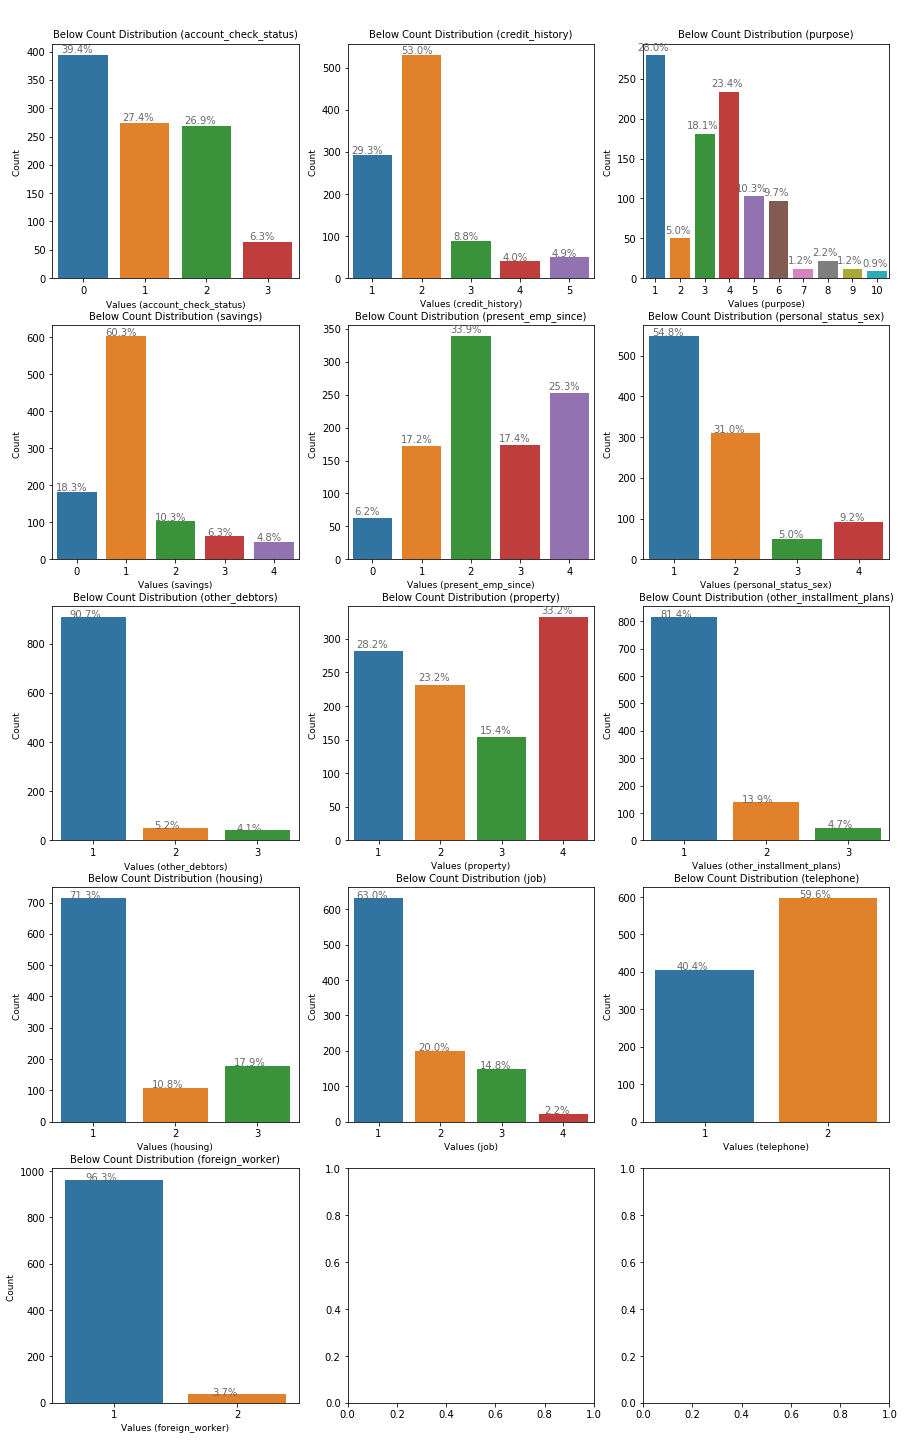

In [77]:
col_c = data_train.select_dtypes(include='category').columns
fig, qaxis = plt.subplots(5,3,figsize=(15,25))
i=0
j=0
k=0
l=0
for i in range (len(col_c)):  
  dd=sns.countplot(x=data_train[col_c[i]], ax = qaxis[j,k])
  dd.set_title('\n\nBelow Count Distribution ({})'.format(col_c[i]), fontsize = 10)
  dd.set_xlabel('Values ({})'.format(col_c[i]), fontsize = 9)
  dd.set_ylabel('Count ', fontsize = 9)
  # find the values and append to list
  totals = []
  for l in dd.patches:
    totals.append(l.get_height())

  # set individual bar lables using above list
  total = sum(totals)

  # set individual bar lables using above list
  for l in dd.patches:
    # get_x pulls left or right; get_height pushes up or down
    dd.text(l.get_x()+.30,l.get_height()+10,str(round((l.get_height()/total)*100, 2))+'%',ha = 'center', va = 'center', fontsize=10,color='dimgrey', rotation=0)
  
  k=k+1
  j=j
  if k==3:
    j=j+1
    k=0
    

In [78]:
data_train.select_dtypes(include='category').columns[:6]

Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex'],
      dtype='object')

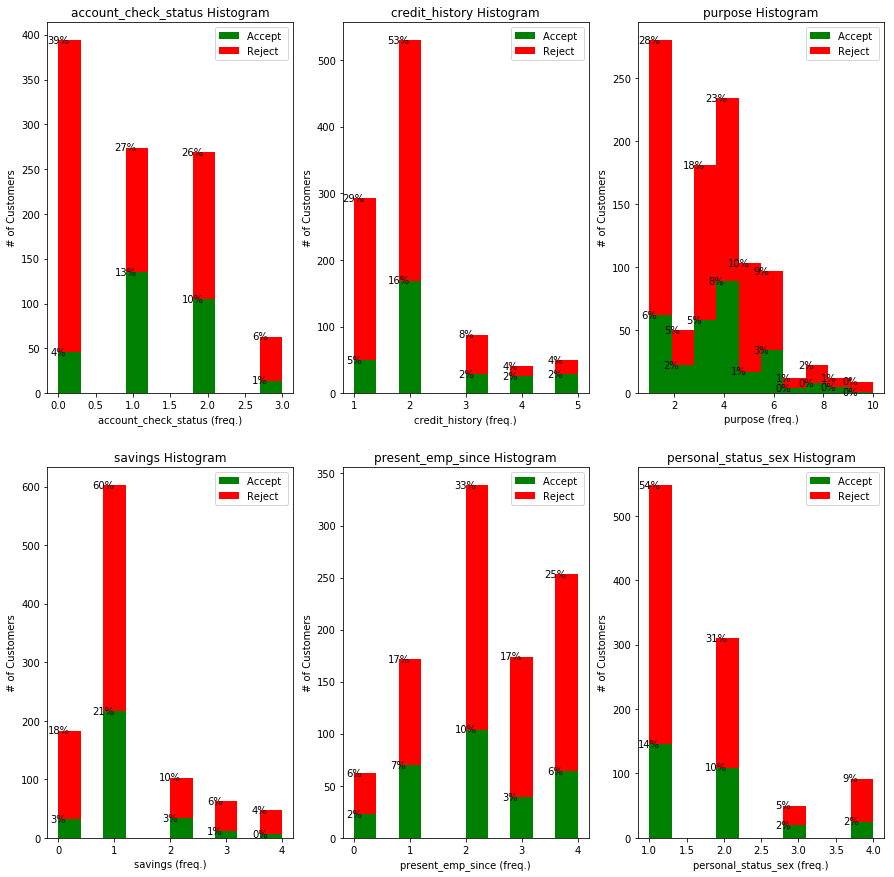

In [79]:
#graph distribution of categorical data vs Default
plt.figure(figsize=[15,15])

dis_col = data_train.select_dtypes(include='category').columns[:6]


c=231

for a in range(len(dis_col)):
  plt.subplot(c)
  d1 = plt.hist(x = [data_train[data_train['default']==1][dis_col[a]], data_train[data_train['default']==0][dis_col[a]]], 
         stacked=True, color = ['g','r'],label = ['Accept ','Reject '])
  plt.title('{} Histogram'.format(dis_col[a]))
  plt.xlabel('{} (freq.)'.format(dis_col[a]))
  plt.ylabel('# of Customers')
  plt.legend()
  for i in range(len(d1[0][0])):
    if (d1[0][0][i] != 0.0 ):
      #plt.text(d[1][0]+.12,d[0][0],str(round(d[0][0])),fontsize=13)  ## xy
      plt.text(d1[1][i],d1[0][1][i],'{}%'.format(int((d1[0][1][i]/np.sum(d1[0][1])*100))), ha = 'center', va = 'center',fontsize=10,rotation=0)  ## xy
      #print('{:1.2f}%'.format(round(d[0][1][i]/np.sum(d[0][1])*100)))
      plt.text(d1[1][i],d1[0][0][i],'{}%'.format(int((d1[0][0][i]/np.sum(d1[0][1])*100))), ha = 'center', va = 'center',fontsize=10,rotation=0)
      
  c=c+1
    

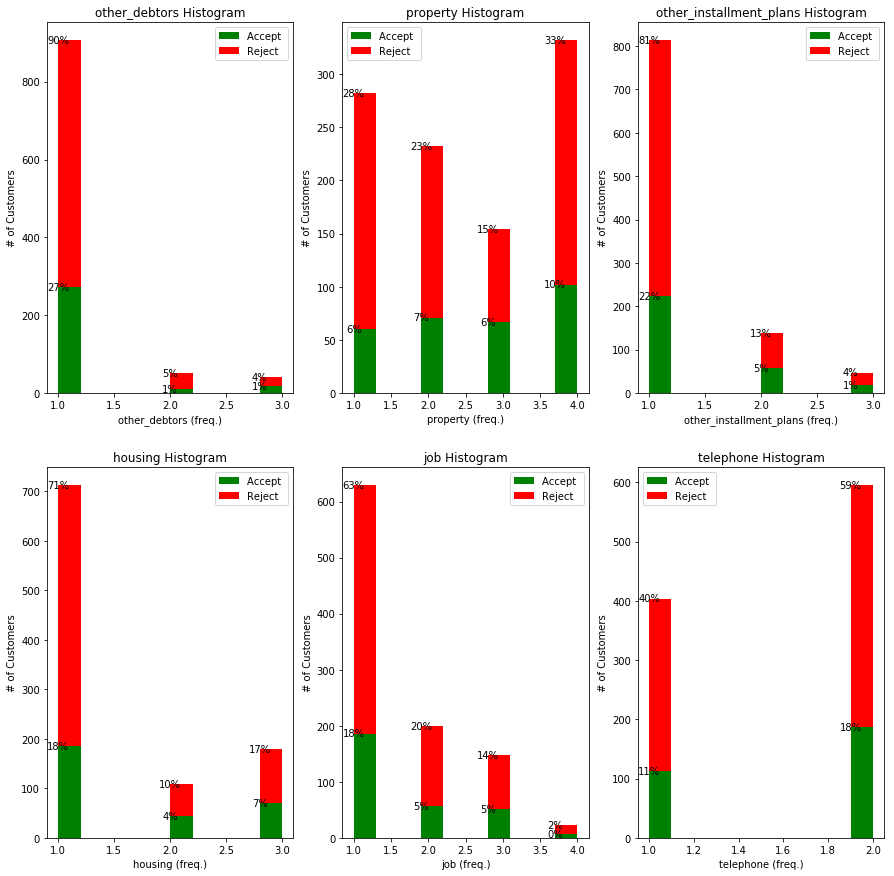

In [80]:
#graph distribution of categorical data vs Default
plt.figure(figsize=[15,15])

dis_col = data_train.select_dtypes(include='category').columns[6:12]


c=231

for a in range(len(dis_col)):
  plt.subplot(c)
  d1 = plt.hist(x = [data_train[data_train['default']==1][dis_col[a]], data_train[data_train['default']==0][dis_col[a]]], 
         stacked=True, color = ['g','r'],label = ['Accept ','Reject '])
  plt.title('{} Histogram'.format(dis_col[a]))
  plt.xlabel('{} (freq.)'.format(dis_col[a]))
  plt.ylabel('# of Customers')
  plt.legend()
  for i in range(len(d1[0][0])):
    if (d1[0][0][i] != 0.0 ):
      #plt.text(d[1][0]+.12,d[0][0],str(round(d[0][0])),fontsize=13)  ## xy
      plt.text(d1[1][i],d1[0][1][i],'{}%'.format(int((d1[0][1][i]/np.sum(d1[0][1])*100))), ha = 'center', va = 'center',fontsize=10,rotation=0)  ## xy
      #print('{:1.2f}%'.format(round(d[0][1][i]/np.sum(d[0][1])*100)))
      plt.text(d1[1][i],d1[0][0][i],'{}%'.format(int((d1[0][0][i]/np.sum(d1[0][1])*100))), ha = 'center', va = 'center',fontsize=10,rotation=0)
      
  c=c+1
    

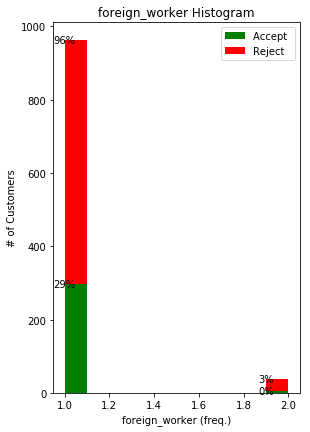

In [81]:
#graph distribution of categorical data vs Default
plt.figure(figsize=[15,15])

dis_col = data_train.select_dtypes(include='category').columns[12:]


c=231

for a in range(len(dis_col)):
  plt.subplot(c)
  d1 = plt.hist(x = [data_train[data_train['default']==1][dis_col[a]], data_train[data_train['default']==0][dis_col[a]]], 
         stacked=True, color = ['g','r'],label = ['Accept ','Reject '])
  plt.title('{} Histogram'.format(dis_col[a]))
  plt.xlabel('{} (freq.)'.format(dis_col[a]))
  plt.ylabel('# of Customers')
  plt.legend()
  for i in range(len(d1[0][0])):
    if (d1[0][0][i] != 0.0 ):
      #plt.text(d[1][0]+.12,d[0][0],str(round(d[0][0])),fontsize=13)  ## xy
      plt.text(d1[1][i],d1[0][1][i],'{}%'.format(int((d1[0][1][i]/np.sum(d1[0][1])*100))), ha = 'center', va = 'center',fontsize=10,rotation=0)  ## xy
      #print('{:1.2f}%'.format(round(d[0][1][i]/np.sum(d[0][1])*100)))
      plt.text(d1[1][i],d1[0][0][i],'{}%'.format(int((d1[0][0][i]/np.sum(d1[0][1])*100))), ha = 'center', va = 'center',fontsize=10,rotation=0)
      
  c=c+1
    

In [0]:
#################################  FEATURE SELECTION ####################################################



In [0]:
 ############### 1- UNIVARIATE SELECTION ##############################

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
X1 = data_train.drop('default',axis=1)  #independent columns
y1 = data_train['default']    #target column i.e price range

In [0]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X1,y1)

In [85]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                         Specs         Score
4                credit_amount  58262.490007
1            duration_in_month    321.030795
0         account_check_status     35.758955
12                         age     30.200309
2               credit_history     26.162592
6            present_emp_since      8.232742
14                     housing      6.345872
11                    property      4.731936
3                      purpose      3.186933
13     other_installment_plans      2.433129
7   installment_as_income_perc      2.204619
8          personal_status_sex      0.935548
5                      savings      0.900360
15           credits_this_bank      0.495516
16                         job      0.329736
19              foreign_worker      0.231483
18                   telephone      0.200621
9                other_debtors      0.141261
10           present_res_since      0.003766
17    people_under_maintenance      0.001031


In [0]:

#################### 2- Feature Importance ####################################

from sklearn.ensemble import ExtraTreesClassifier

In [89]:
model = ExtraTreesClassifier(criterion='entropy')
model.fit(X1,y1)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

[0.10125451 0.09086162 0.05700386 0.06036311 0.08444022 0.05249326
 0.05724047 0.04255429 0.04381374 0.01888261 0.04920059 0.04715833
 0.07704594 0.03774744 0.03521699 0.03165676 0.04549927 0.02427143
 0.03171042 0.01158512]


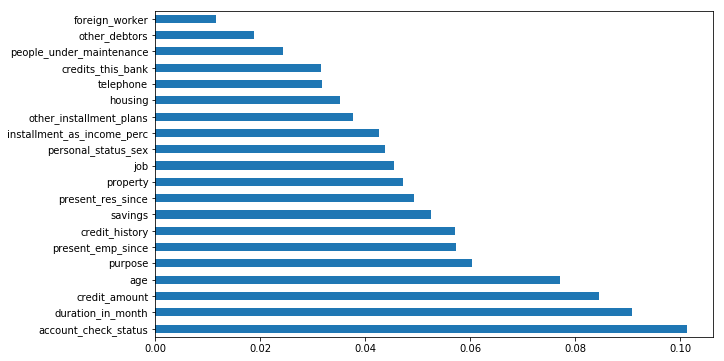

In [91]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
plt.figure(figsize=(10,6))
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [0]:

#################### 3- Correlation Matrix with Heatmap ####################################

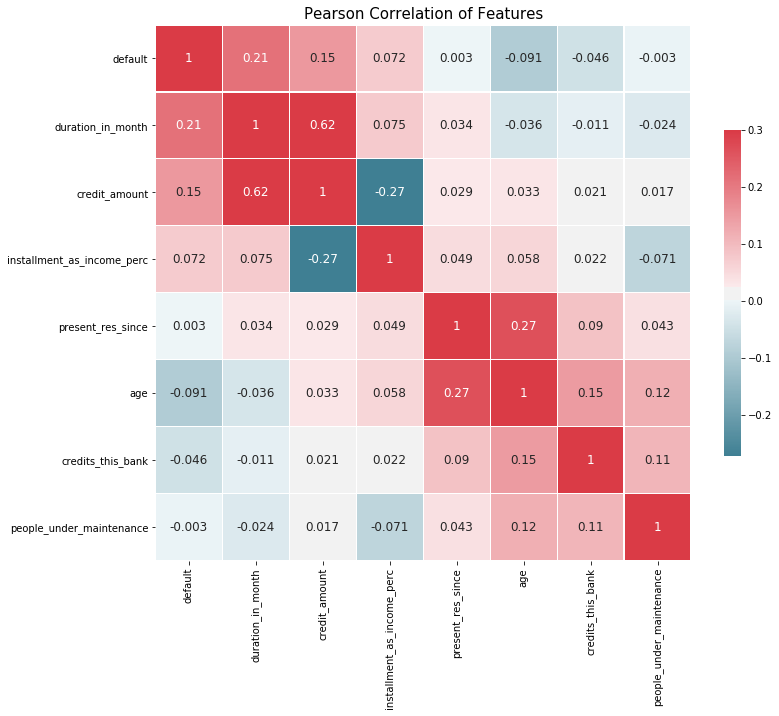

In [93]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    fig , ax = plt.subplots(figsize =(12,12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(df.corr(),cmap = colormap,square=True,cbar_kws={'shrink':.5 }, ax=ax,annot=True,linewidths=0.1,vmax=0.3, linecolor='white',annot_kws={'fontsize':12 } )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data_train)



In [0]:
## making a copy of our dataset

data_train1 = data_raw.copy(deep=True)

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=data_train1.drop('default',axis=1)
Y=data_train1['default']

In [0]:
train1_x, test1_x, train1_y, test1_y = train_test_split(X, Y, train_size=0.5,random_state = 2)

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


In [98]:
train1_x.shape

(500, 20)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [99]:
train1_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 281 to 168
Data columns (total 20 columns):
account_check_status          500 non-null object
duration_in_month             500 non-null int64
credit_history                500 non-null object
purpose                       500 non-null object
credit_amount                 500 non-null int64
savings                       500 non-null object
present_emp_since             500 non-null object
installment_as_income_perc    500 non-null int64
personal_status_sex           500 non-null object
other_debtors                 500 non-null object
present_res_since             500 non-null int64
property                      500 non-null object
age                           500 non-null int64
other_installment_plans       500 non-null object
housing                       500 non-null object
credits_this_bank             500 non-null int64
job                           500 non-null object
people_under_maintenance      500 non-null int64


In [0]:
data_train_dummy = pd.get_dummies(data = train1_x.select_dtypes(exclude=['int64','float64']),columns=train1_x.select_dtypes(exclude=['int64','float64']).columns,dummy_na=False)

In [0]:
train1_x = train1_x.drop(columns=train1_x.select_dtypes(exclude=['int64','float64']),axis=1)

In [0]:
train1_x_dummy = pd.concat([train1_x,data_train_dummy],axis=1)

In [103]:
# Print Shape of model data
train1_x_dummy.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [0]:
# Create correlation matrix
corr_matrix = train1_x_dummy.corr().abs()

In [0]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [0]:
upper = upper.replace(np.NaN,0)


In [110]:

idx = upper.index
j=0
for j in range(len(idx)):
  print('column {0} has maximum correlation  as:-  {1}'.format(idx[j],upper.loc[idx[j],:].max(axis=0)))
  j=j+1
        

column duration_in_month has maximum correlation  as:-  0.622181186027373
column credit_amount has maximum correlation  as:-  0.34852378165897596
column installment_as_income_perc has maximum correlation  as:-  0.13887150105767057
column present_res_since has maximum correlation  as:-  0.32964299966571525
column age has maximum correlation  as:-  0.3783439938938545
column credits_this_bank has maximum correlation  as:-  0.5687623595595502
column people_under_maintenance has maximum correlation  as:-  0.2624532809349178
column account_check_status_0 <= ... < 200 DM has maximum correlation  as:-  0.4965635331614244
column account_check_status_< 0 DM has maximum correlation  as:-  0.5041266174373685
column account_check_status_>= 200 DM / salary assignments for at least 1 year has maximum correlation  as:-  0.19507682662870884
column account_check_status_no checking account has maximum correlation  as:-  0.14888750009563992
column credit_history_all credits at this bank paid back duly has

### Drop the original variables which are converted to dummy

In [111]:
train1_x_dummy = train1_x_dummy.drop(columns=data_train.select_dtypes(include='object').columns,axis=1)
train1_x_dummy.shape

(500, 61)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [0]:
X2=np.array(train1_x_dummy)
Y2=np.array(train1_y)

train2_x, test2_x, train2_y, test2_y = train_test_split(X2, Y2, test_size=0.3,random_state = 2)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [0]:
#Import Random Forest Model

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500, n_jobs=2,criterion="entropy",random_state=9999)

In [115]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train2_x,train2_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [0]:

y2_pred=clf.predict(test2_x)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [117]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:=",metrics.accuracy_score(test2_y, y2_pred),"\nConfustion matrix \n",metrics.confusion_matrix(test2_y, y2_pred))

Accuracy:= 0.7533333333333333 
Confustion matrix 
 [[98  8]
 [29 15]]


### Q6 Show the list of the features importance( 1 Marks)

In [118]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=train1_x_dummy.columns).sort_values(ascending=False)
feature_imp

credit_amount                                                                 0.095409
age                                                                           0.081529
duration_in_month                                                             0.074386
account_check_status_no checking account                                      0.052029
installment_as_income_perc                                                    0.034075
present_res_since                                                             0.033489
account_check_status_< 0 DM                                                   0.030297
savings_... < 100 DM                                                          0.026184
account_check_status_0 <= ... < 200 DM                                        0.020462
credits_this_bank                                                             0.019984
purpose_car (new)                                                             0.019087
job_management/ self-employed/ highly quali

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [126]:
train1_x_dummy.head(1)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_.. >= 1000 DM,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_.. >= 7 years,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_female : divorced/separated/married,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_co-applicant,other_debtors_guarantor,other_debtors_none,property_if not A121 : building society savings agreement/ life insurance,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
281,12,1574,4,2,50,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


In [0]:
X3=np.array(train1_x_dummy)
Y3=np.array(train1_y)

In [0]:
##from sklearn.model_selection import KFold
##from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.model_selection import  KFold ,LeaveOneOut

from sklearn.model_selection import cross_val_score

In [0]:

kfold = KFold(n_splits=10, random_state=77, shuffle=False)


In [0]:

for train_index, test_index in kfold.split(X3):

    X_train, X_test = X3[train_index], X3[test_index]

    y_train, y_test = Y3[train_index], Y3[test_index]
  

In [0]:
#Validate the Random Forest model build above using k fold

In [0]:
#Import Random Forest Model

from sklearn.ensemble import RandomForestClassifier

In [0]:
#Create a Gaussian Classifier
clf_k=RandomForestClassifier(n_estimators=500, n_jobs=2,criterion="entropy",random_state=9999)

In [0]:
#Calculate Mean score

In [0]:
results = cross_val_score(clf_k, X3, Y3, cv=kfold)

In [0]:
# Calculate score standard deviation using std()

In [137]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.96 0.78 0.72 0.8  0.74 0.76 0.82 0.88 0.72 0.8 ]
Accuracy: 79.800% (7.125%)


In [0]:
LOO = LeaveOneOut()

In [0]:
results = cross_val_score(clf_k, X3, Y3, cv=LOO)

In [143]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.

# Q8 Print the confusion matrix( 1 Marks)

In [147]:
clf_k.fit(X3[train_index], Y3[train_index])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [0]:
from sklearn.metrics import confusion_matrix

In [149]:
print (confusion_matrix(Y3[test_index], clf_k.predict(X3[test_index])))
print(10* '#')

[[36  0]
 [10  4]]
##########


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [151]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:=",metrics.accuracy_score(Y3[test_index], clf_k.predict(X3[test_index])))

Accuracy:= 0.8


In [0]:
from sklearn.metrics import classification_report

In [155]:
print(classification_report(Y3[test_index], clf_k.predict(X3[test_index])))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        36
           1       1.00      0.29      0.44        14

    accuracy                           0.80        50
   macro avg       0.89      0.64      0.66        50
weighted avg       0.84      0.80      0.76        50



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [0]:
from sklearn.metrics import roc_curve, auc

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

In [157]:
Z = pd.DataFrame(roc_curve(Y3[test_index], clf_k.predict(X3[test_index])))
print(Z)

     0         1    2
0  0.0  0.000000  1.0
1  0.0  0.285714  1.0
2  2.0  1.000000  0.0


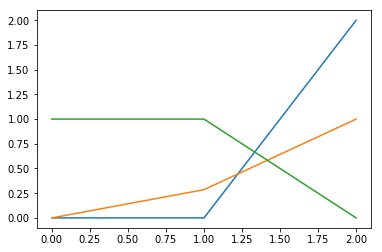

In [158]:
plt.plot(Z)

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [0]:
Y3_pred_proba = clf_k.predict_proba(X3[test_index])[::,1]  


In [0]:
fpr, tpr, _ = metrics.roc_curve(Y3[test_index], clf_k.predict(X3[test_index]))


In [0]:
auc = metrics.roc_auc_score(Y3[test_index], Y3_pred_proba)


Accuracy 0.8


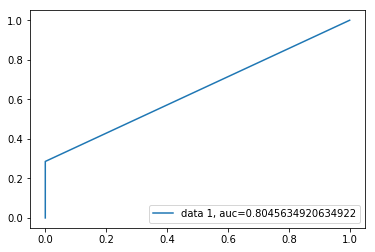

In [162]:
print("Accuracy", metrics.accuracy_score(Y3[test_index], clf_k.predict(X3[test_index])))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [0]:
values = train1_x_dummy.values

In [165]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10   # Number of bootstrap samples to create
n_size = int(len(train1_x_dummy) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

accuracy = []    


# run bootstrap
stats = list()

# run bootstrap
stats = list()
for i in range(bootstrap_iteration):
	# prepare train and test sets
	train = resample(values, n_samples=n_size, replace=True, stratify=None,random_state=0)  # Sampling with replacement -Bagging
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = RandomForestClassifier()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)


0.9709677419354839
0.9612903225806452
0.9612903225806452
0.9741935483870968
0.964516129032258
0.9612903225806452
0.9935483870967742
0.9612903225806452
0.967741935483871
0.964516129032258


In [166]:
np.mean(stats)

0.9680645161290322

In [167]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10   # Number of bootstrap samples to create
n_size = int(len(train1_x_dummy) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

accuracy = []    


# run bootstrap
stats = list()

# run bootstrap
stats = list()
for i in range(bootstrap_iteration):
	# prepare train and test sets
	train = resample(values, n_samples=n_size, replace=False, stratify=None,random_state=0)  # Sampling without replacement - Pasting
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = RandomForestClassifier()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)


0.968
0.972
0.992
0.988
0.976
0.972
0.98
0.984
0.98
0.996


In [168]:
np.mean(stats)

0.9808